# <center> **Analyzing the Impact of Macroeconomic Indicators on Nifty50 Using Granger Causality** </center>

### **NAME: ABHIRAM KULKARNI**

### **1. DATA COLLECTION**

In [200]:
import pandas as pd
combined_data = pd.read_csv("macrodata.csv")


In [190]:
#importing the nifty50 dataset
nifty50 = pd.read_csv("nifty50_data.csv")
nifty50 = nifty50[2:]
nifty50 = nifty50.drop(["Volume"],axis=1)
nifty50.fillna(method='ffill', inplace=True) 
nifty50 = nifty50.drop(["Open","Low","High"],axis =1)
nifty50.head()

,Price,Close
2,2007-09-17,4494.64990234375
3,2007-09-18,4546.2001953125
4,2007-09-19,4732.35009765625
5,2007-09-20,4747.5498046875
6,2007-09-21,4837.5498046875


### **2. DATA PREPROCESSING**

In [191]:
#handling the missing values
combined_data.fillna(method='ffill', inplace=True)  
combined_data.fillna(method="bfill",inplace=True) 

In [192]:
#Refining the data
data = combined_data[2:]
data = data.rename(columns={
    "USDINR=X": "USD_INR",
    "CL=F": "Crude_Oil_Price",
    "^GSPC": "S&P_500",
    "^DJI": "Dow_Jones",
    "000300.SS":"China",
    "^N225":"Nikkei"
})


In [193]:
# Reset the column names to the second-level header
data.columns = data.columns.droplevel(0)  
# Rename the Ticker column to Date
data.rename(columns={"": "Date"}, inplace=True)
# Display the updated DataFrame
data.head()


Ticker,Date,USD_INR,Crude_Oil_Price,S&P_500,Dow_Jones,China,Nikkei
2,2007-09-19,40.033001,81.930000,1529.030029,13815.559570,5128.220215,16381.540039
3,2007-09-20,39.615002,83.320000,1518.750000,13766.700195,5128.220215,16413.789062
4,2007-09-21,39.770000,81.620003,1525.750000,13820.190430,5128.220215,16312.610352
5,2007-09-24,39.431000,80.949997,1517.729980,13759.059570,5128.220215,16312.610352
6,2007-09-25,39.660000,79.529999,1517.209961,13778.650391,5128.220215,16401.730469


In [194]:
# Ensure Date columns are in datetime format
nifty50.rename(columns={"Price": "Date"}, inplace=True)
nifty50['Date'] = pd.to_datetime(nifty50['Date'])
data['Date'] = pd.to_datetime(data['Date'])

# Merge on the Date column
merged_data = pd.merge(nifty50, data, on='Date', how='inner')
merged_data = pd.DataFrame(merged_data)
# Display the merged dataset
print(merged_data.columns)


Index(['Date', 'Close', 'USD_INR', 'Crude_Oil_Price', 'S&P_500', 'Dow_Jones',
       'China', 'Nikkei'],
      dtype='object')


### **3. EXPLORATORY DATA ANALYSIS**

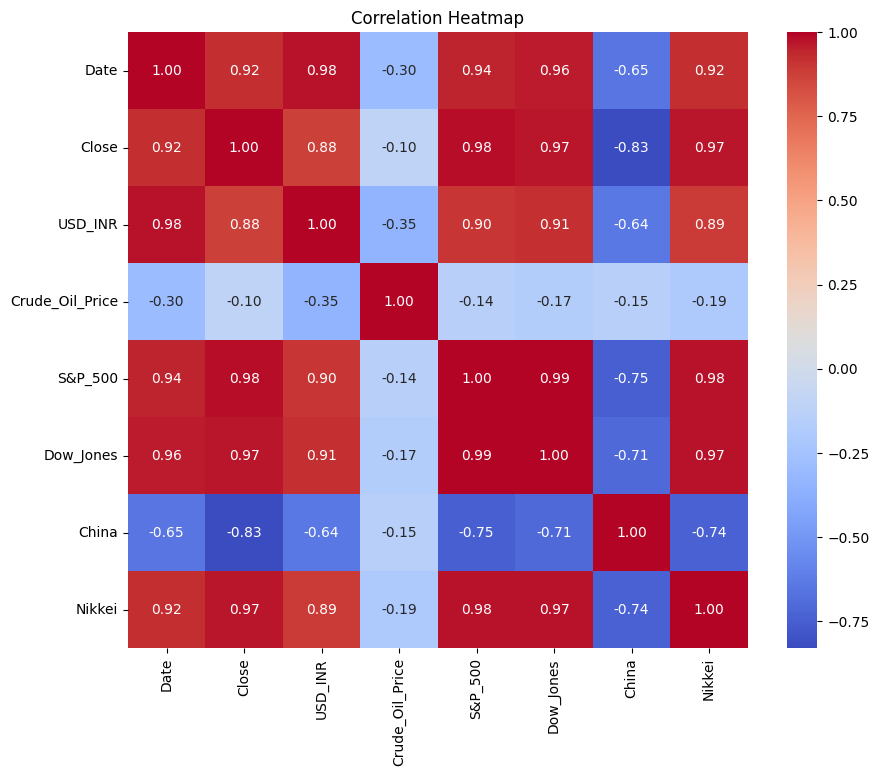

In [195]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
correlation = merged_data.corr()

# Plotting heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


### **4. APPLYING GRANGER CAUSALITY TEST**

In [196]:

from statsmodels.tsa.stattools import grangercausalitytests

# List of predictors
predictors = ['Crude_Oil_Price', 'USD_INR', 'S&P_500']

# Initialize a dictionary to store results
results_dict = {}

for predictor in predictors:
    # Run Granger Causality Test
    results = grangercausalitytests(merged_data[['Close', predictor]], maxlag=5, verbose=False)
    
    # Extract F-test values and p-values for each lag
    f_values = []
    p_values = []
    for lag, result in results.items():
        ssr_ftest = result[0]['ssr_ftest']
        f_values.append(ssr_ftest[0])  # F-test value
        p_values.append(ssr_ftest[1])  # p-value
    
    # Store results in the dictionary
    results_dict[predictor] = {'lags': list(range(1, 6)), 'f_values': f_values, 'p_values': p_values}

# Convert results into DataFrames for plotting
results_df = {key: pd.DataFrame(value) for key, value in results_dict.items()}


c:\Users\ABHIRAM KULKARNI007\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\ABHIRAM KULKARNI007\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\ABHIRAM KULKARNI007\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [197]:
# Granger causality: Test if S&P 500 influences China
grangercausalitytests(merged_data[['China', 'S&P_500']], maxlag=5)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.1410  , p=0.0419  , df_denom=4231, df_num=1
ssr based chi2 test:   chi2=4.1440  , p=0.0418  , df=1
likelihood ratio test: chi2=4.1419  , p=0.0418  , df=1
parameter F test:         F=4.1410  , p=0.0419  , df_denom=4231, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=21.3097 , p=0.0000  , df_denom=4228, df_num=2
ssr based chi2 test:   chi2=42.6699 , p=0.0000  , df=2
likelihood ratio test: chi2=42.4563 , p=0.0000  , df=2
parameter F test:         F=21.3097 , p=0.0000  , df_denom=4228, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=14.0598 , p=0.0000  , df_denom=4225, df_num=3
ssr based chi2 test:   chi2=42.2493 , p=0.0000  , df=3
likelihood ratio test: chi2=42.0398 , p=0.0000  , df=3
parameter F test:         F=14.0598 , p=0.0000  , df_denom=4225, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=10.8391 , p=0.

{1: ({'ssr_ftest': (4.141038399143487, 0.04191770002254747, 4231.0, 1),
   'ssr_chi2test': (4.14397461166947, 0.04178295404402155, 1),
   'lrtest': (4.1419480022086645, 0.0418330026639597, 1),
   'params_ftest': (4.141038399104781, 0.04191770002349649, 4231.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (21.30974233114021, 6.189142036905038e-10, 4228.0, 2),
   'ssr_chi2test': (42.66988613420838, 5.424403084339738e-10, 2),
   'lrtest': (42.45625805052259, 6.035881476900871e-10, 2),
   'params_ftest': (21.30974233115333, 6.189142036823241e-10, 4228.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (14.059804884842048, 4.0609948702285596e-09, 4225.0, 3),
   'ssr_chi2test': (42.24929770839162, 3.5519624444717474e-09, 3),
   'lrtest': (42.039797322722734, 3.934859812461146e-09, 3),
   'params_ftest': (14.059804884833099, 4.0609948702819996e-09, 4225.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0

## **5.VISUALIZATION**

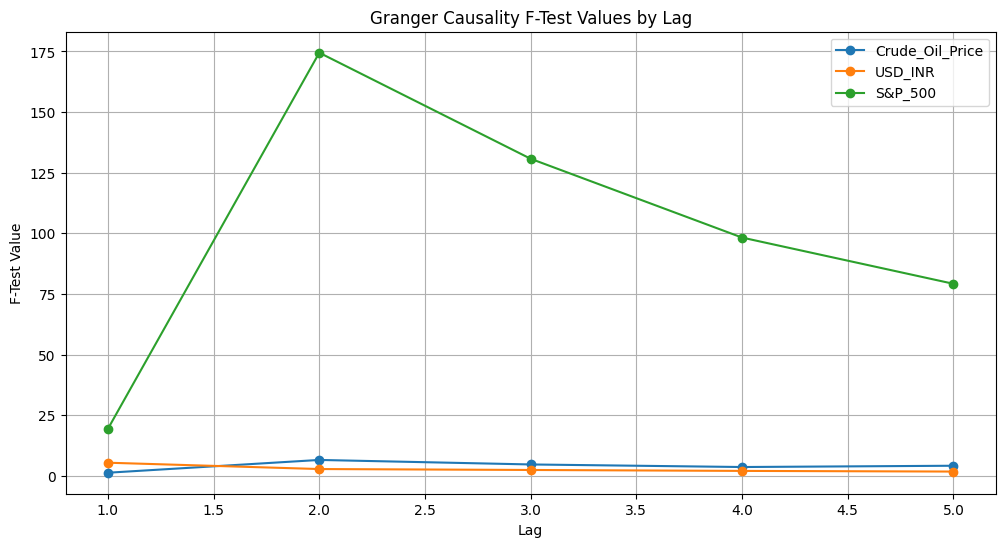

In [198]:
plt.figure(figsize=(12, 6))

# Plot F-test values for each predictor
for predictor, df in results_df.items():
    plt.plot(df['lags'], df['f_values'], marker='o', label=f'{predictor}')

# Add plot details
plt.title("Granger Causality F-Test Values by Lag")
plt.xlabel("Lag")
plt.ylabel("F-Test Value")
plt.legend()
plt.grid()
plt.show()


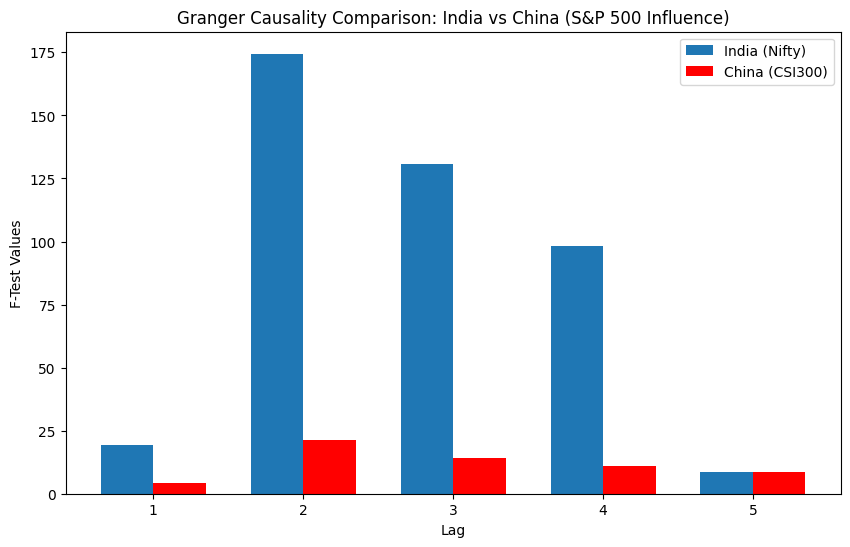

In [199]:
import numpy as np

lags = [1, 2, 3, 4, 5]
f_values_india = [19.3536, 174.4597, 130.7259, 98.2365, 8.8063] 
f_values_china = [4.1410, 21.3097, 14.0598, 10.8391, 8.8063]    

# Plot
x = np.arange(len(lags))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, f_values_india, width, label='India (Nifty)')
plt.bar(x + width/2, f_values_china, width, label='China (CSI300)', color='red')
plt.xticks(x, lags)
plt.xlabel("Lag")
plt.ylabel("F-Test Values")
plt.title("Granger Causality Comparison: India vs China (S&P 500 Influence)")
plt.legend()
plt.show()


### **6. CONCLUSION**

## <center> Significance of Macroeconomic Indicators on Nifty50 </center>

### 1. Granger Causality F-Test Values by Lag
- The first plot illustrates the influence of three key macroeconomic indicators — **Crude Oil Price**, **USD/INR**, and **S&P 500** — on **Nifty50**.
- **Key Observations:**
  - **S&P 500** has the most significant impact on Nifty50, with high F-test values, especially at lag 2 (~175).
  - **Crude Oil Price** and **USD/INR** have a comparatively weaker influence, with consistently low F-test values across all lags.
  - This demonstrates that global market movements, particularly those reflected in the **S&P 500**, have a stronger predictive power for Nifty50 compared to local macroeconomic factors like exchange rates or crude oil prices.

### 2. Granger Causality Comparison: India vs. China (S&P 500 Influence)
- The second plot compares the influence of **S&P 500** on **Nifty50 (India)** and **CSI300 (China)** across different lags.
- **Key Observations:**
  - **Nifty50** shows much stronger Granger causality from the S&P 500, with significantly higher F-test values across all lags.
  - In contrast, **CSI300** exhibits a far weaker relationship, as indicated by lower F-test values.
  - This stark difference highlights:
    1. **India's market dependency** on global trends, especially those from the US market.
    2. **China's relative independence**, possibly due to domestic policy-driven dynamics and insulation from global economic factors.

---

### Implications
- **For Investors:**
  - The Nifty50's strong alignment with global indices like the **S&P 500** underscores the importance of monitoring global market trends for investment strategies in India.

---
